
### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-apr14.csv`.

#### Keeping the dataset ready before questions

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
uber_df = pd.read_csv('uber-raw-data-apr14.csv')
uber_df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [2]:
# Convert the 'Date/Time' column to datetime format
uber_df['Date/Time'] = pd.to_datetime(uber_df['Date/Time'])

# Group by date and count the number of pickups
uber_df['Date'] = uber_df['Date/Time'].dt.date
pickup_counts = uber_df.groupby('Date')['Lat'].count()
date_with_most_pickups = pickup_counts.idxmax()

# Find the date with the highest number of pickups

print("Date with the most highest number of pickup:",date_with_most_pickups)


Date with the most highest number of pickup: 2014-04-30


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [3]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
# Get the count of pickups on the highest date

date_with_highest_pickups = pickup_counts.idxmax()
number_of_pickups = pickup_counts[date_with_highest_pickups]
print("Date with the highest number of pickups:", date_with_highest_pickups)

print("Number of uber pickups on the highest pickup date:", number_of_pickups)





Date with the highest number of pickups: 2014-04-30
Number of uber pickups on the highest pickup date: 36251


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [4]:
# Count the number of unique TLC base companies
unique_companies =uber_df['Base'].nunique()
print(unique_companies)


5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [5]:
# Group by TLC base company and count the number of pickups
# Find the TLC base company with the highest number of pickups
pickup_counts=uber_df.groupby('Base')['Lat'].count()
highest_pickup_company = pickup_counts.idxmax()
print("TLC base company with the highest number of pickups:", highest_pickup_company)



TLC base company with the highest number of pickups: B02682


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [6]:
# Group by TLC base company and count the number of pickups
pickup_counts=uber_df.groupby('Base')['Lat'].count()
print(pickup_counts)


Base
B02512     35536
B02598    183263
B02617    108001
B02682    227808
B02764      9908
Name: Lat, dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [7]:
# Extract the hour from the 'Date/Time' column


# Group by hour and count the number of pickups
# Find the hour with the highest number of pickups
uber_df['Hour'] =uber_df['Date/Time'].dt.hour
pickup_counts1 =uber_df.groupby('Hour').size()
hour_with_highest_pickups = pickup_counts1.idxmax()
am_pm = 'AM' if hour_with_highest_pickups < 12 else 'PM'
if hour_with_highest_pickups > 12:
    hour_with_highest_pickups -= 12

print("Hour with the highest number of pickups:", hour_with_highest_pickups, am_pm)


Hour with the highest number of pickups: 5 PM


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

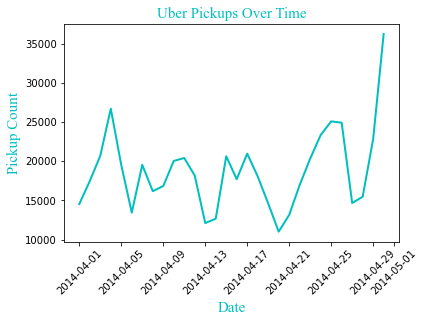

In [8]:
# Group by date and count the number of pickups
pickup_count_by_date =uber_df.groupby('Date')['Lat'].count()

# Create a line plot to visualize the number of pickups over time
plt.plot(pickup_count_by_date.index, pickup_count_by_date.values,color= 'c' ,linewidth = 2)

plt.xlabel("Date",fontsize = 15,fontname = 'Times New Roman',color = 'c')
plt.ylabel("Pickup Count",fontsize = 15,fontname = 'Times New Roman',color = 'c')
plt.title("Uber Pickups Over Time",fontsize = 15,fontname = 'Times New Roman',color = 'c')
plt.xticks(rotation=45)
plt.show()


#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

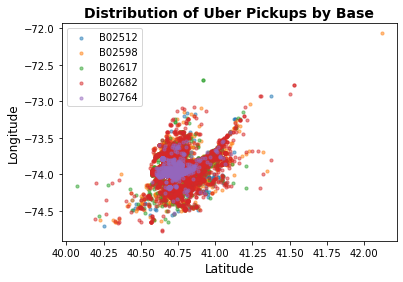

In [9]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
grouped_data = uber_df.groupby('Base')
# create a scatter plot for each group
for group_name, group_data in grouped_data:
    plt.scatter(group_data['Lat'], group_data['Lon'], label=group_name, s=10, alpha=0.5)

plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)
plt.title('Distribution of Uber Pickups by Base', fontsize=14, fontweight='bold')
plt.legend()

plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

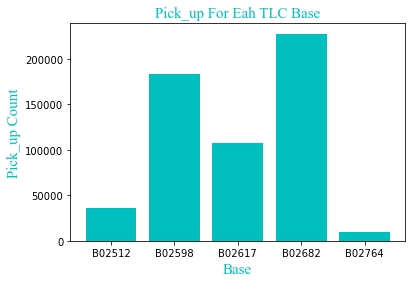

In [10]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
pickup_count_base=uber_df.groupby('Base')['Lat'].count()
#pickup_count_base_
plt.bar(pickup_count_base.index,pickup_count_base.values, color ='c')
plt.xlabel('Base',fontname = 'times new roman', fontsize=15,c='c')
plt.ylabel('Pick_up Count',fontname='times new roman',fontsize=15,c='c')
plt.title('Pick_up For Eah TLC Base',fontname='times new roman',fontsize=15,c='c')
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

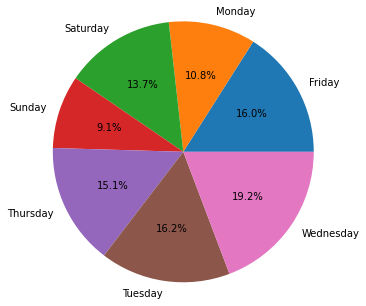

In [11]:
# Group by day of the week and count the number of pickups
busiest_hour = pickup_counts1.idxmax()

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
uber_df['DayOfWeek'] = uber_df['Date/Time'].dt.day_name()
#print(df['DayOfWeek'])
pickup_counts = uber_df.groupby('DayOfWeek')['Lat'].count()
labels = pickup_counts.index
counts = pickup_counts.values
percentages = counts / counts.sum() * 100
plt.pie(percentages, labels=labels, autopct='%0.1f%%',radius=1.5)
plt.show()